
# Assignment No 2a
#### Assignment Credit 
###### *Dr. Sibt ul Hussain*
----
## Goal

Your goal in this assigment is to implement a Gaussian Bayes Classifier.

There are two different flavours of Bayes Rule

- Naive Bayes
- **Gaussian Bayes**


### Instructions
- Do not modify the block with test cases.
- Do not tailor your solution to only pass the test cases. We will use different data for grading so keep your solution generic.
- Passing all the cases means you are in reight direction, but does not ensure 100% marks, there may be some other cases hidden, so carefully read the question statement and implement all the necessory functionality.
- <p style="color:#ff0000">Plagiarism of any kind, (including internet) will lead to zero marks.</p>

#### Libraries
Ther are two additional libraries used which are not included in Anaconda package, nose and seaborn. You can install them using the following commands :
```sh
conda install -c anaconda nose=1.3.7
conda install -c anaconda seaborn=0.7.1
```
Version of different libraries used are listed below:
- Matplotlib **1.5.1**
- Pandas **0.18.1**
- Numpy **1.11.1**
- Scipy **0.17.1**
- Seaborn **0.7.1**

Code for checking version info is present in cell below.

#### Dead Kernal
In case kernel does not connect, and shows a dead kernal meggese in read : 
- Go to Kernal -> Change kernal, and choose any of the available kernels.
- Press ctrl + s and close the tab.
- Open the notebook again and the kernel will connect. If it still does not connect then go to Kernel -> restart.

**Note : ** Accuracies may slightly vary due to randomness in train-text split. 

In [63]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [64]:
%pylab inline
import scipy.stats
import pandas as pd
from collections import defaultdict
import seaborn as sns
#many important functions are already written and provided in tools.py 
# please have a look at these functions....
import tools as t


plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
print ("Matplotlib version : ", matplotlib.__version__)
print ("Pandas version : ", pd.__version__)
print ("Numpy version : ", np.__version__)
print ("Scipy version : ", scipy.__version__)
print ("Seaborn version : ", sns.__version__)

Matplotlib version :  3.9.2
Pandas version :  2.2.2
Numpy version :  1.26.4
Scipy version :  1.14.0
Seaborn version :  0.13.2


In [66]:
# YOUR CODE HERE

class GaussianBayes:
    ''' Implements the Gaussian Bayes For Classification... '''
    def __init__(self):
        self.k = 0
        self.u_lists = []
        self.cov_matrixs = []
        self.dets = []
        self.invs = []
        self.class_data = { 'Iris-setosa' : [], "Iris-versicolor" : [], "Iris-virginica" : [] }


    def clear_parameters(self):

        # * Clearing all the parameters
        self.k = 0
        self.u_lists = []
        self.cov_matrixs = []
        self.dets = []
        self.invs = []
        self.class_data = { 'Iris-setosa' : [], "Iris-versicolor" : [], "Iris-virginica" : [] }
        self.priori = {}


    def train(self, X, Y):
        ''' Train the multiclass (or Binary) Bayes Rule using the given 
            X [m x n] data matrix and Y labels matrix'''
        
        # YOUR CODE HERE
        
        self.clear_parameters()
        
        # * Storing row in respective class
        for data, val in zip(X, Y):
            for key in self.class_data.keys():
                if val == key:
                    self.class_data[key].append(list(data))
                    break

        self.k = X.shape[1]
        self.priori = { key : list(Y).count(key) / len( Y ) for key in self.class_data.keys() } # * Priori Probability

        # * Calculate important features/data for each class
        for class_name, data  in self.class_data.items():
            self.u_lists.append( np.mean(data, axis=0) )
            cov_matrix = np.cov(np.array(data).T)
            self.cov_matrixs.append( cov_matrix )
            self.dets.append( np.linalg.det(cov_matrix) )
            self.invs.append( np.linalg.inv(cov_matrix) )

        
    def test(self, X):
        
        ''' Run the trained classifiers on the given set of examples 
            For each example, you should return probability and its assigned class
            Input: X of m x d
            Output:
            pclasses: predicted class of each example
            probability: probability of each example falling in that predicted class...
        '''
        # YOUR CODE HERE

        res_probs = []   
        probabilities = []     

        for x in X:
            probs = []
            for index, class_name in enumerate(self.class_data.keys()):
                diff = x - self.u_lists[index]
                prob = ( np.exp( - np.dot( diff.T, np.dot(diff, self.invs[index] ) ) / 2 ) ) / ( np.sqrt( ((2 * np.pi) ** self.k) * self.dets[index] ) ) * self.priori[class_name]  # Multivariate Gaussian Distribution
                probs.append(prob)
            
            
            # * Append the predicted class based on the highest probability
            max_class = list( self.class_data.keys() )[np.argmax(probs)]
            res_probs.append(max_class)
            probabilities.append(max(probs))                   

        return res_probs, probabilities
        
    def predict(self, X):
        return self.test(X)[0]    
        

In [67]:
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print (data.describe())

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


#### Lets Visualize the data

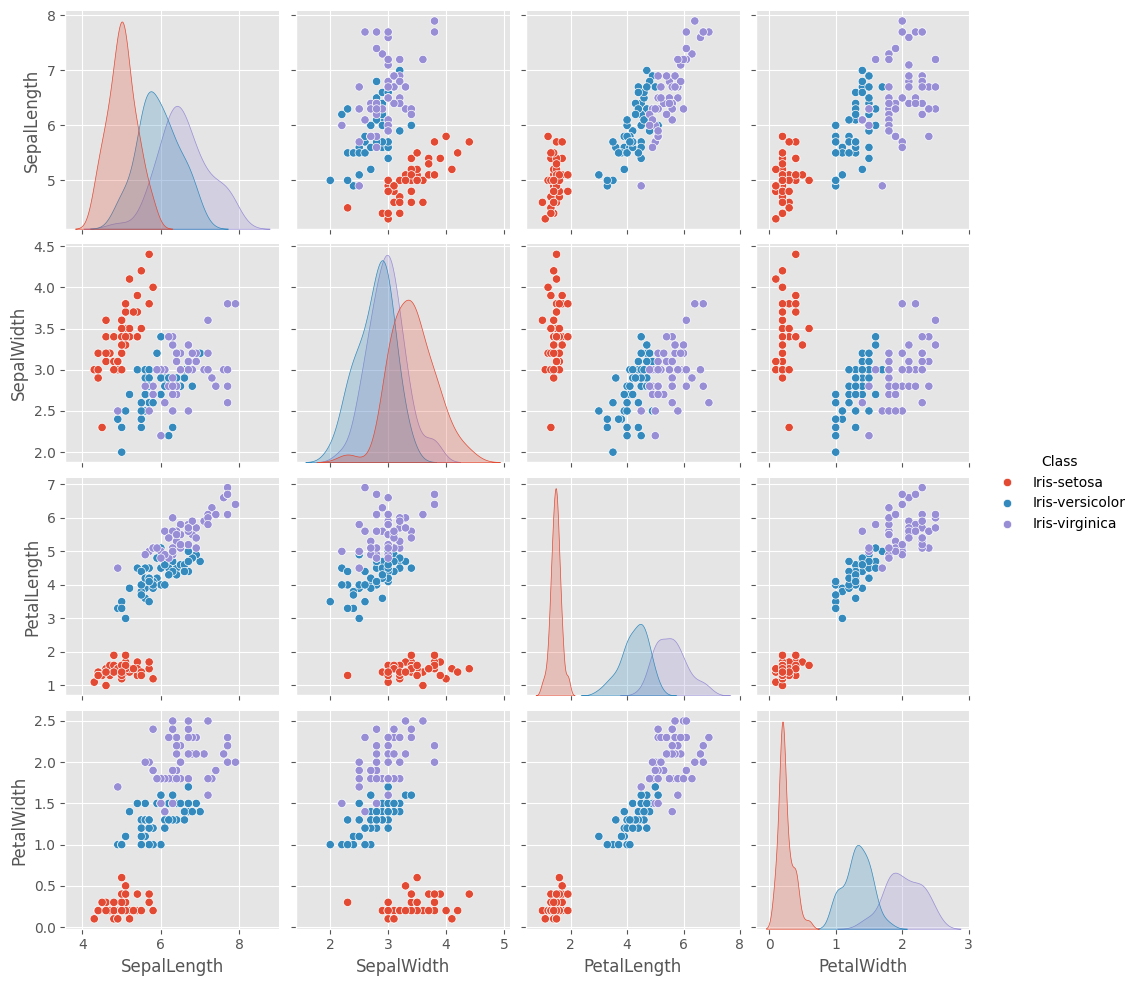

In [68]:
sns.pairplot(data, hue="Class")

#### Get your data in matrix

In [69]:
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print (" Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape)

 Data Set Dimensions= (149, 4)  True Class labels dimensions (149,)


#### Let's Plot the Data

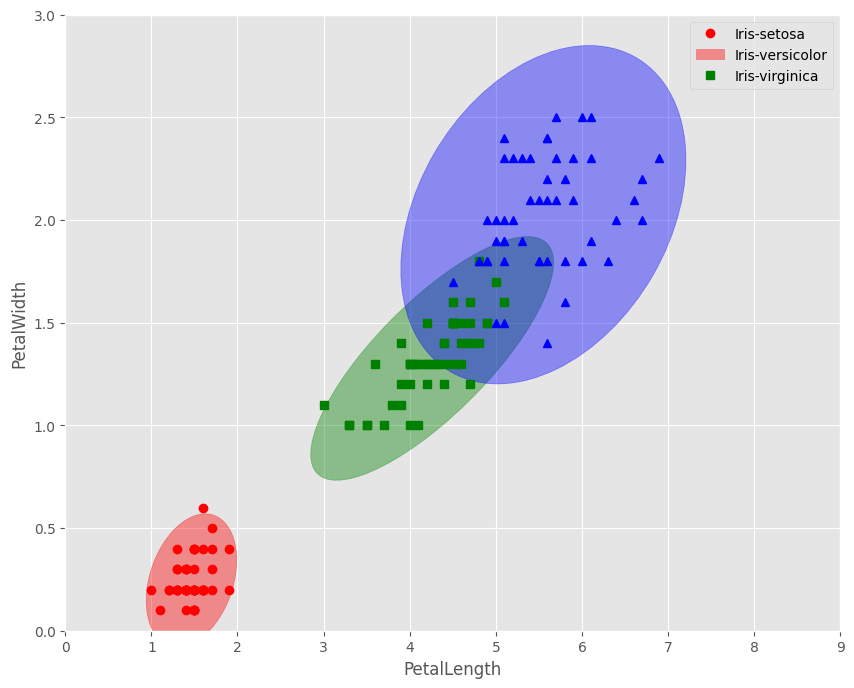

In [70]:
#Lets plot the Complete data, with its covariance matrix...
# Remember seeing is believing
featnames=data.columns
t.plotCov(X[:,2:],Y,labels=featnames.values[2:4])

### Splitting the Data into Training and Testing Sets
There must be a validation set but for this case we are using only two sets, training and validation sets...

In [71]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...

Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print (" Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape) 
print (" Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape)

 Training Data Set Dimensions= (104, 4) Training True Class labels dimensions (104,)
 Test Data Set Dimensions= (45, 4) Test True Class labels dimensions (104,)


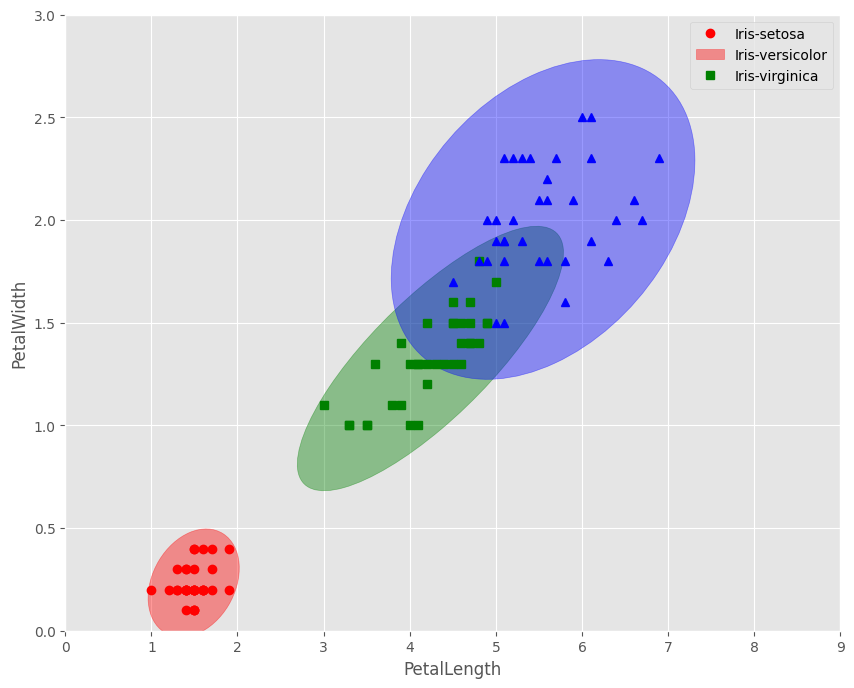

In [72]:
#Lets plot the training data...
t.plotCov(Xtrain[:,2:],Ytrain, labels=featnames.values[2:4])
# so we will be estimating these covariance matrices and means...

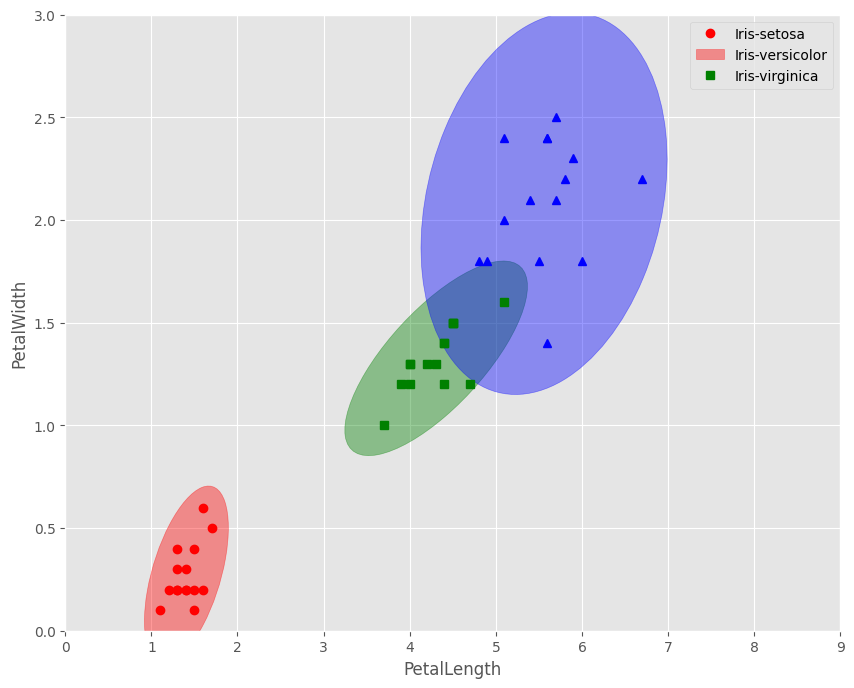

In [73]:
#Lets plot the test data...
t.plotCov(Xtest[:,2:],Ytest,labels=featnames.values[2:4])

Training Time
========
Let's train a Gaussian Bayes, first using two attributes.
- What Two Attributes to use ? Any Guess...

Answer: Judging from the pairplot drawn above, we can assume that petal length and petal width will approximately perform better as datapoints are better separated in them as compared to Sepal Length and Sepal Width where the classes of datapoints are largely overlapping

In [74]:
# Lets train a Gaussian Bayes Classifier on Petal Length and Width
gb=GaussianBayes()
gb.train(Xtrain[:,2:],Ytrain)

In [75]:
#Lets test it on the set of unseen examples...

pclasses,res=gb.test(Xtest[:,2:])

In [76]:
pclasses, res

(['Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-virginica'],
 [0.9989238348909537,
  3.2224965395989553,
  0.0004684119193002415,
  0.19273065386795674,
  1.949771173242074,
  1.935737474466

Lets see how good we are doing...
==================

In [77]:
#Lets see how good we are doing...
print (pclasses==Ytest)
print (Ytest.shape[0])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
45


In [78]:
# Using Just two attributes, accuracy is 

print (np.sum(pclasses==Ytest))
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

45
Accuracy =  1.0


 Plotting the Decision Surface of Training Set... 


d:\D-Documents\University\Sem 5\ML\Assignmet1\Assi1\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


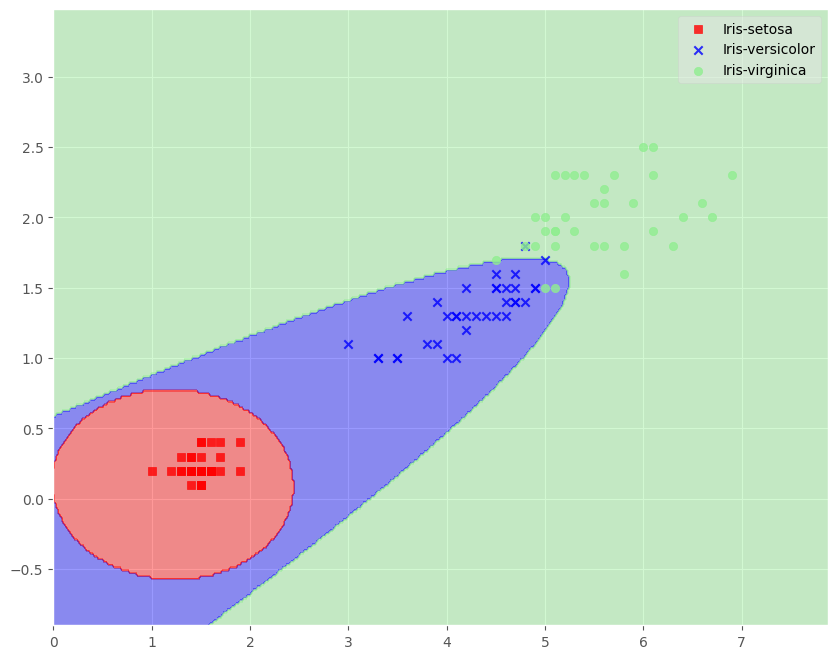

In [79]:
print (" Plotting the Decision Surface of Training Set... ")
t.plot_decision_regions(Xtrain[:,2:],Ytrain,clf=gb, res=0.02, cycle_marker=True, legend=1)

### Test cases for your classifier

In [80]:
from nose.tools import assert_greater_equal, assert_is_not_none
import pandas as pd
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())

data_val = pd.read_csv('./iris_val.data')
data_val.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X_val = np.asarray(data_val[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y_val = np.asarray(data_val['Class'].dropna())

gb_val=GaussianBayes()
gb_val.train(X[:,2:],Y)
pclasses_val, _ = gb_val.test(X_val[:,2:])
acc_val = np.sum(pclasses_val == Y_val) / float(np.array(pclasses_val).shape[0])

assert_greater_equal(acc_val, 0.90, msg="Acc must be greater then 90%")

cls =gb_val.predict(np.array([2,2]).reshape((1,2)))
assert_is_not_none(cls, msg="Predict should work for single example")

print("All cases passed !")

All cases passed !


## Question: What can you conclude from the above decision Region

Iris-setosa is clearly separated from the other species. Making it easier to classify.

Iris-versicolor and Iris-virginica have overlapping regions, indicating they are more difficult to classify and there might be some ambiguity in their decision boundaries.

# K-Fold Cross Validation

Since our dataset is not too big, to ensure that we are reporting true picture of our classifier, 
we will have to cross validate and report the mean accuracy across the folds to reflect the true 
picture of our classifier.

In [81]:
# Now lets cross validate, and test the result...
nfolds=4
folds=t.generate_folds(X,Y,nfolds)

#now lets train and test on these folds...
totacc=[]
for k in range(nfolds):
    gb=GaussianBayes()
    gb.train(folds[k][0][:,2:],folds[k][1])
    pclasses,res=gb.test(folds[k][2][:,2:])
    acc=np.sum(pclasses==folds[k][3])/float(folds[k][3].shape[0])
    print ("[Info] Fold {} Accuracy = {}".format(k+1, acc))
    totacc.append(acc)

print (totacc, 'Mean Accuracy =', np.mean(totacc))

Generating CV data for 3 classes
[Info] Fold 1 Accuracy = 0.9444444444444444
[Info] Fold 2 Accuracy = 0.9722222222222222
[Info] Fold 3 Accuracy = 0.9722222222222222
[Info] Fold 4 Accuracy = 0.9722222222222222
[0.9444444444444444, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222] Mean Accuracy = 0.9652777777777778



Hmm Quite Impressive...
--------------------------------

In [82]:
# Lets go and use all the four attributes...
gb.train(Xtrain,Ytrain)

In [83]:
pclasses,res=gb.test(Xtest)

#### Do you expect your Test accuracy to increase or decrease ?

The accuracy will increase or remain same as before as we are training the model from scratch on the same XTrain dataset and testing on the same XTest dataset. The K-folds cross validation helped in understanding that the model performance properly over the entire dataset. It will increase if we dont reintialize it after training each time in cross-validation.

In [84]:
# Using all four attributes, accuracy is 
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

Accuracy =  0.9777777777777777


### Test cases for all four attributes

In [85]:
from nose.tools import assert_greater_equal, assert_is_not_none
import pandas as pd
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())

data_val = pd.read_csv('./iris_val.data')
data_val.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X_val = np.asarray(data_val[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y_val = np.asarray(data_val['Class'].dropna())

gb_val=GaussianBayes()
gb_val.train(X,Y)
pclasses_val, _ = gb_val.test(X_val)
acc_val = np.sum(pclasses_val == Y_val) / float(np.array(pclasses_val).shape[0])

assert_greater_equal(acc_val, 0.90, msg="Acc must be greater then 90%")

cls =gb_val.predict(np.array([2,2,2,2]).reshape((1,4)))
assert_is_not_none(cls, msg="Predict should work for single example")

print ("All cases passed !")

All cases passed !


What can you conclude ?
====================

All test cases passed. Multivariate Guassian Formula has shown great results as accuracy is above 90% for all 4 features as well. The model correctly identifies the 3 classes of Iris dataset.

K-folds Cross Validation also proves that the model has been correctly implemented as mean accuracy is also above 90%. Changing combination of features can provide different results so it's important to choose the right combination of features and validate them using k-folds cross validation.

## Let's change the features... 

In [86]:
features=[0, 1]
gb.train(Xtrain[:,features],Ytrain)
pclasses,res=gb.test(Xtest[:,features])
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

Accuracy =  0.7333333333333333


Remember Features are the important !!
======================

d:\D-Documents\University\Sem 5\ML\Assignmet1\Assi1\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


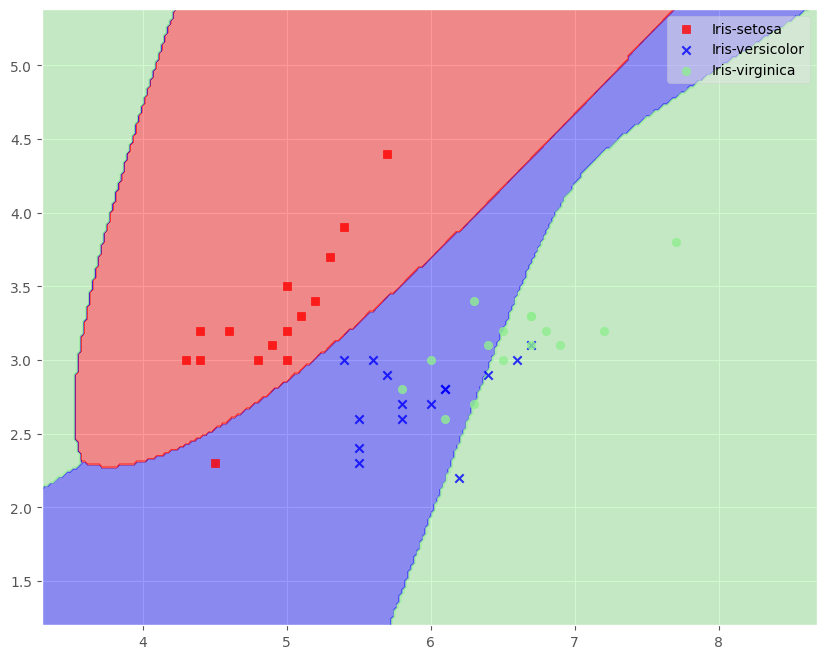

In [87]:
t.plot_decision_regions(Xtest[:,features],Ytest,clf=gb, res=0.02, cycle_marker=True, legend=1)

## Goal: Find the best pair of features (that gives maximum mean cross-validation accuracy) from all the available pairs for the problem in hand

In [88]:

# * Function to get all possible combinations of features
def get_combinations(features, n):
    if n == 0:
        return [[]]  # * Return empty combination for n=0
    if n > len(features):
        return []  # * Return empty list if n is larger than the number of features
    
    # * Store combinations
    result = []
    
    # * Recursive function to build combinations
    def combine(start, path):
        if len(path) == n:
            result.append(path)
            return
        
        for i in range(start, len(features)):
            combine(i + 1, path + [features[i]])
    
    combine(0, [])
    return result



In [89]:

# * Define the features
features = [0, 1, 2, 3]

# * Get combinations of all lengths
# combinations_1 = get_combinations(features, 1)
combinations_2 = get_combinations(features, 2)
combinations_3 = get_combinations(features, 3)
combinations_4 = get_combinations(features, 4)

# * Combine all combinations
# all_combinations = combinations_1 + combinations_2 + combinations_3 + combinations_4
all_combinations = combinations_2 + combinations_3 + combinations_4

for combo in all_combinations:
    print(combo)

# * Print the total number of combinations
print(f'Total combinations: {len(all_combinations)}')


[0, 1]
[0, 2]
[0, 3]
[1, 2]
[1, 3]
[2, 3]
[0, 1, 2]
[0, 1, 3]
[0, 2, 3]
[1, 2, 3]
[0, 1, 2, 3]
Total combinations: 11


In [90]:

max_acc = 0.0
max_feature = None

for features in all_combinations:
    gb.train(Xtrain[:,features],Ytrain)
    pclasses,res=gb.test(Xtest[:,features])

    accuracy = np.sum(pclasses==Ytest)/float(Ytest.shape[0])

    if accuracy > max_acc:
        max_acc = accuracy
        max_feature = features

    print (f"Accuracy {features} = ", accuracy)


Accuracy [0, 1] =  0.7333333333333333
Accuracy [0, 2] =  0.9111111111111111
Accuracy [0, 3] =  0.9555555555555556
Accuracy [1, 2] =  0.9333333333333333
Accuracy [1, 3] =  0.9333333333333333
Accuracy [2, 3] =  1.0
Accuracy [0, 1, 2] =  0.9333333333333333
Accuracy [0, 1, 3] =  0.9333333333333333
Accuracy [0, 2, 3] =  0.9555555555555556
Accuracy [1, 2, 3] =  0.9555555555555556
Accuracy [0, 1, 2, 3] =  0.9777777777777777


In [91]:
print(f"Max accuracy was given by feature combination : {max_feature} = {max_acc * 100} % ")

Max accuracy was given by feature combination : [2, 3] = 100.0 % 
